In [ ]:
# importing the necessary packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AA datasets/data_orders.csv')
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/AA datasets/data_offers.csv')
df1.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [ ]:
# Joining both the datasets
dff = pd.merge(df,df1,left_on='order_gk',right_on='order_gk',how= 'inner')
dff.sample(n =10)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
10061,08:18:41,-0.969119,51.455001,NaN,3000588432870,4,0,70.0,300051212595
5436,23:04:08,-0.954270,51.435905,418.0,3000624467609,4,1,43.0,300051917146
11977,22:22:33,-0.947315,51.444300,237.0,3000598763592,4,1,513.0,300051631966
4742,09:00:29,-0.973247,51.458857,837.0,3000629108327,4,1,80.0,300052202449
25008,18:34:13,-0.974864,51.435860,NaN,3000578076453,4,0,148.0,300050861095
1595,20:13:42,-0.999031,51.447941,236.0,3000600012137,4,1,109.0,300051690910
16207,22:18:51,-0.970557,51.459935,NaN,3000623793149,9,0,NaN,300051872143
14443,01:12:31,-0.974804,51.454851,NaN,3000625817878,9,0,NaN,300052008578
17667,21:06:13,-0.976053,51.455937,NaN,3000623116776,9,0,NaN,300051826823
17809,02:21:30,-0.974363,51.456564,NaN,3000622640607,9,0,NaN,300051780928


In [ ]:
# Improving the readability of the dataset
dff['is_driver_assigned'] = np.where(dff['is_driver_assigned_key'] == 0, 'No','Yes')
dff['order_status'] = np.where(dff['order_status_key'] == 9,'System Reject','Client cancelled')

dff.drop(columns=['is_driver_assigned_key','order_status_key'],inplace = True)
dff.sample(10)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
25642,20:37:02,-0.919532,51.458775,NaN,3000583766054,48.0,300051028902,No,Client cancelled
13653,01:57:41,-0.966087,51.465263,178.0,3000592620575,350.0,300051380291,Yes,Client cancelled
5588,01:04:26,-0.969568,51.451614,239.0,3000551456507,164.0,300050591729,Yes,Client cancelled
27496,15:47:51,-0.946310,51.454334,NaN,3000629281803,257.0,300052220103,No,Client cancelled
1855,05:51:03,-0.933906,51.440436,NaN,3000584690636,NaN,300051076559,No,System Reject
20208,00:24:16,-1.032638,51.461325,NaN,3000595796165,NaN,300051549296,No,System Reject
2526,02:57:18,-0.972970,51.453987,NaN,3000585265789,NaN,300051110250,No,System Reject
4282,21:23:58,-0.969039,51.452214,NaN,3000591381023,139.0,300051351908,No,Client cancelled
6268,20:44:50,-0.897889,51.449414,NaN,3000595696411,NaN,300051543163,No,System Reject
21315,01:51:04,-0.973348,51.453919,NaN,3000590880949,70.0,300051338937,No,Client cancelled


In [ ]:
dff.rename(columns={'order_datetime':'order_time'},inplace=True)
dff.head()

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client cancelled
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client cancelled
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client cancelled
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,Client cancelled
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,Client cancelled


In [ ]:
dff.groupby(by = ['is_driver_assigned','order_status'])['order_gk'].count()

is_driver_assigned  order_status    
No                  Client cancelled    13435
                    System Reject        9469
Yes                 Client cancelled     8360
                    System Reject           4
Name: order_gk, dtype: int64

In [ ]:
# Pivoting the columns
dff_q1 = dff.pivot_table(columns=['is_driver_assigned','order_status'],values='order_gk',aggfunc='count')
dff_q1

is_driver_assigned               No                            Yes  \
order_status       Client cancelled System Reject Client cancelled   
order_gk                      13435          9469             8360   

is_driver_assigned                
order_status       System Reject  
order_gk                       4

#1.
###Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

<Axes: >

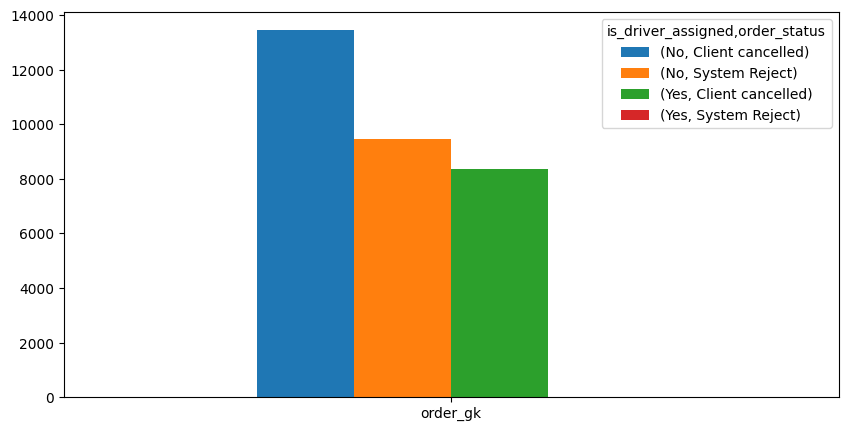

In [ ]:
dff_q1.plot(kind = 'bar', figsize=(10,5),rot = 0)

In [ ]:
dff['order_hour'] = pd.to_datetime(dff['order_time']).dt.hour
dff.head()

/tmp/ipython-input-31-1912621063.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dff['order_hour'] = pd.to_datetime(dff['order_time']).dt.hour


,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,order_hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client cancelled,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client cancelled,20
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client cancelled,20
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,Client cancelled,20
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,Client cancelled,12


#2.
###Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails?

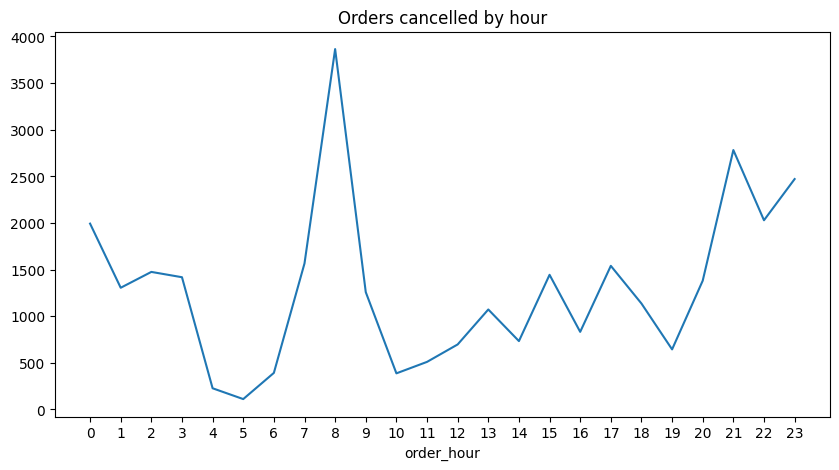

In [ ]:
dff.groupby('order_hour')['order_gk'].count().plot(kind = 'line',figsize=(10,5))
plt.xticks(range(0,24))
plt.title('Orders cancelled by hour')
plt.show()


In [ ]:
grouped_q2 = dff.groupby(by = ['order_hour','is_driver_assigned','order_status'])['order_gk'].count()
grouped_q2

order_hour  is_driver_assigned  order_status    
0           No                  Client cancelled     957
                                System Reject        706
            Yes                 Client cancelled     326
                                System Reject          4
1           No                  Client cancelled     633
                                                    ... 
22          No                  System Reject        660
            Yes                 Client cancelled     415
23          No                  Client cancelled    1144
                                System Reject        883
            Yes                 Client cancelled     444
Name: order_gk, Length: 73, dtype: int64

In [ ]:
dff_q2 = grouped_q2.reset_index().pivot(index='order_hour', columns=['is_driver_assigned','order_status'],values = 'order_gk')
dff_q2.head()

is_driver_assigned               No                            Yes  \
order_status       Client cancelled System Reject Client cancelled   
order_hour                                                           
0                             957.0         706.0            326.0   
1                             633.0         374.0            298.0   
2                             586.0         649.0            240.0   
3                             565.0         658.0            195.0   
4                              90.0          45.0             92.0   

is_driver_assigned                
order_status       System Reject  
order_hour                        
0                            4.0  
1                            NaN  
2                            NaN  
3                            NaN  
4                            NaN

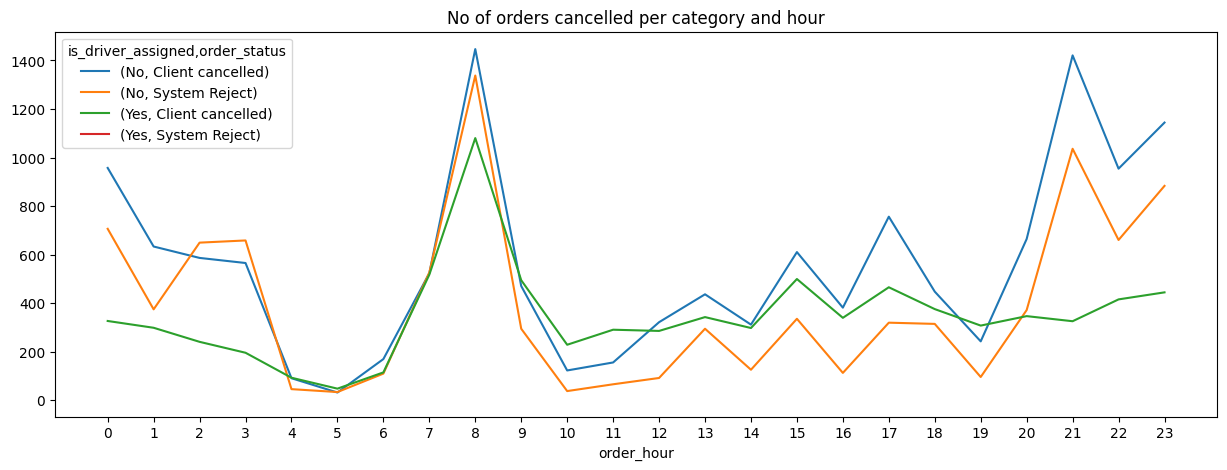

In [ ]:
dff_q2.plot(figsize=(15,5))
plt.xticks(range(0,24))
plt.title('No of orders cancelled per category and hour')
plt.show()


In [ ]:
dff_q3 = dff.groupby(by = ['order_hour','is_driver_assigned'])['cancellations_time_in_seconds'].mean()
dff_q3.head()

order_hour  is_driver_assigned
0           No                    115.126437
            Yes                   276.082822
1           No                    100.593997
            Yes                   296.312081
2           No                    121.305461
Name: cancellations_time_in_seconds, dtype: float64

#4.
###Plot the average time to cancellation with and without driver, by the hour.

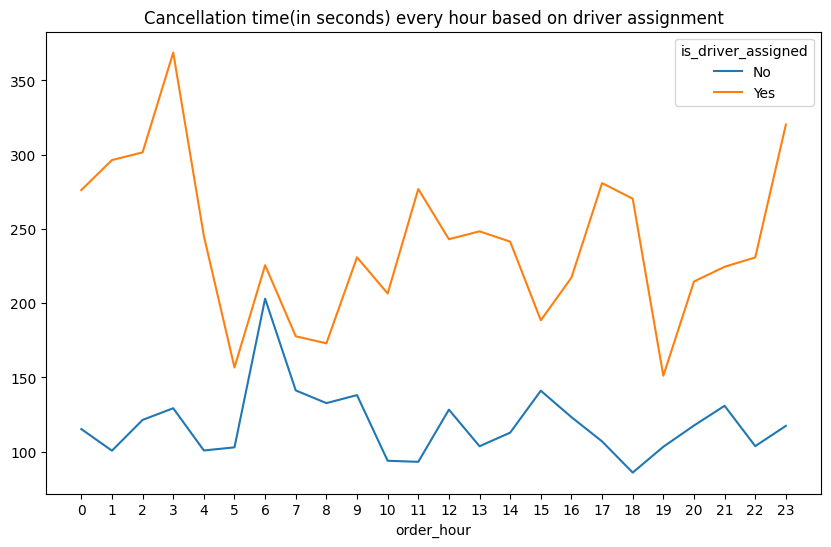

In [ ]:
dff_q3.reset_index().pivot(index = 'order_hour',columns= ['is_driver_assigned'],values = 'cancellations_time_in_seconds').plot(figsize=(10,6))
plt.xticks(range(0,24))
plt.title('Cancellation time(in seconds) every hour based on driver assignment')
plt.show()

#4.
###Plot the distribution of average ETA by hours.


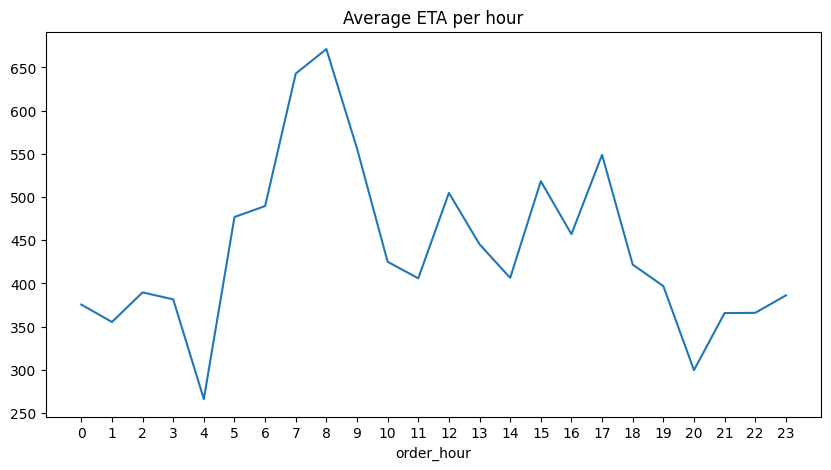

In [ ]:
dff.groupby(by = 'order_hour')['m_order_eta'].mean().plot(figsize=(10,5))
plt.xticks(range(0,24))
plt.title('Average ETA per hour')
plt.show()